<a href="https://colab.research.google.com/github/mcalmeida13/hidden-markov-models/blob/main/linear_regression_moore_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reference

https://en.wikipedia.org/wiki/Transistor_count

In [62]:
columns = ['processor','mos_transistor_count','date_introduction','designer','mos_process_nm','area_mm']

In [63]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv'
df = pd.read_csv(url, sep='\t',names=columns)
df.head()

,processor,mos_transistor_count,date_introduction,designer,mos_process_nm,area_mm
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   processor             102 non-null    object
 1   mos_transistor_count  102 non-null    object
 2   date_introduction     102 non-null    object
 3   designer              102 non-null    object
 4   mos_process_nm        97 non-null     object
 5   area_mm               95 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB


In [65]:
df['mos_transistor_count'] = df['mos_transistor_count'].str.replace(',','')

In [66]:
df['mos_transistor_count'] = df['mos_transistor_count'].apply(lambda x: x.split('[')[0])

In [67]:
df['mos_transistor_count'].unique()

array(['2300', '3500', '4500', '4100', '5000', '8000', '3510', '6500',
       '8500', '29000', '9000', '68000', '11500', '55000', '134000',
       '22000', '190000', '25000', '275000', '16000', '30000', '553000',
       '180000', '250000', '300000', '1180235', '35000', '1350000',
       '3100000', '578977', '5500000', '2500000', '4300000', '8800000',
       '7500000', '21300000', '22000000', '111000', '27400000', '9500000',
       '42000000', '21000000', '45000000', '220000000', '55000000',
       '105900000', '54300000', '410000000', '592000000', '112000000',
       '169000000', '228000000', '241000000', '291000000', '1700000000',
       '184000000', '362000000', '463000000', '26000000', '411000000',
       '789000000', '758000000', '47000000', '230000000', '731000000',
       '1900000000', '904000000', '1000000000', '1200000000',
       '2300000000', '2000000000', '1400000000', '1170000000',
       '2600000000', '1160000000', '2270000000', '5000000000',
       '3100000000', '21000000

In [68]:
df['mos_transistor_count'] = df['mos_transistor_count'].str.replace('~','')
df['mos_transistor_count'] = df['mos_transistor_count'].str.replace('cca ','')

In [69]:
df['date_introduction'] = df['date_introduction'].apply(lambda x: x.split('[')[0])

In [70]:
df['mos_transistor_count'] = df['mos_transistor_count'].astype(int)
df['date_introduction'] = df['date_introduction'].astype(int)

In [71]:
df.head()

,processor,mos_transistor_count,date_introduction,designer,mos_process_nm,area_mm
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²


In [72]:
df['log_transistor_count'] = np.log(df['mos_transistor_count'])

In [73]:
df.head()

,processor,mos_transistor_count,date_introduction,designer,mos_process_nm,area_mm,log_transistor_count
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²,7.740664
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²,8.160518
2,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²,8.411833
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²,8.318742
4,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²,8.517193


In [74]:
X = df['date_introduction']
y = df['mos_transistor_count']

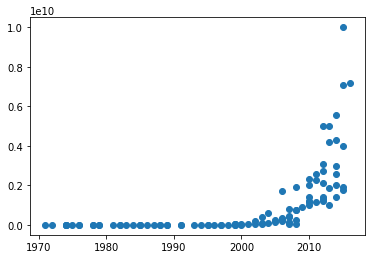

In [75]:
plt.scatter(X,y)
plt.show()

In [76]:
y_log = df['log_transistor_count']

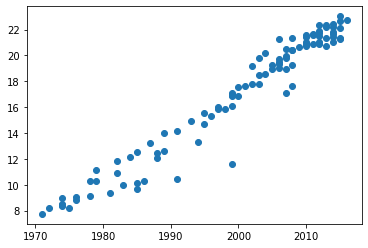

In [77]:
plt.scatter(X,y_log)
plt.show()

In [78]:
xx = X.dot(X)
xy = X.dot(y_log)

In [79]:
x_mean = X.mean()
y_mean = y_log.mean()
x_sum = X.sum()
y_sum = y_log.sum()

In [80]:
denominator = xx - x_mean*x_sum
a = (xy - y_mean*x_sum)/denominator
b = (y_mean*xx - x_mean*xy)/denominator

In [81]:
y_hat = a*X + b

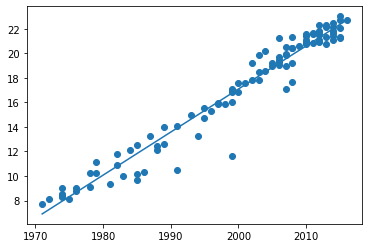

In [82]:
plt.scatter(X,y_log)
plt.plot(X, y_hat)

In [83]:
d1 = y_log - y_hat
d2 = y_log -y_mean
r2 = 1 - d1.dot(d1)/d2.dot(d2)
print('a:',a)
print('b:',b)
print('the r-squared is::',r2)

a: 0.35104357336507297
b: -685.0002843818177
the r-squared is:: 0.9529442852285761


In [84]:
# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a

In [85]:
print("time to double:", np.log(2)/a, "years")

time to double: 1.9745331723794202 years
